![](ChemE_logo.png "ChemE Logo")

# ExempliPy
by [Tony Saad](www.tonysaad.net) <br/>
Assistant Professor of [Chemical Engineering](www.che.utah.edu) <br/>
[University of Utah](www.utah.edu)


A collection of example of problems solved numerically with Python. Applications span physics, chemical, mechanical, civil, and electrical engineering.

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#ExempliPy" data-toc-modified-id="ExempliPy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ExempliPy</a></div><div class="lev1 toc-item"><a href="#Free-Fall:-ODE-Time-Integration" data-toc-modified-id="Free-Fall:-ODE-Time-Integration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Free Fall: ODE Time Integration</a></div><div class="lev2 toc-item"><a href="#Method-1:-Using-Lists" data-toc-modified-id="Method-1:-Using-Lists-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Method 1: Using Lists</a></div><div class="lev2 toc-item"><a href="#Method-2:-Using-Numpy-Arrays" data-toc-modified-id="Method-2:-Using-Numpy-Arrays-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Method 2: Using Numpy Arrays</a></div><div class="lev1 toc-item"><a href="#Interpolation" data-toc-modified-id="Interpolation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Interpolation</a></div>

# Free Fall: ODE Time Integration

Consider the free fall of an astronaut subject to drag. The governing equation is according to Newton's second law is:
$$m \frac{\text{d}u}{\text{d} t} = m g - c u$$
or
$$\frac{\text{d}u}{\text{d} t} = g - \frac{c}{m} u$$
where $u$(m/s) is the (downward) speed of the astronaut, $g$(m/s/s) is the acceleration of gravity, and $c$(kg/s) is the drag coefficient. Here, the drag force acts in the direction opposite to the fall of the astronaut and is given by $F_\text{D} = cu\mathbf{j}$

## Method 1: Using Lists

0.0


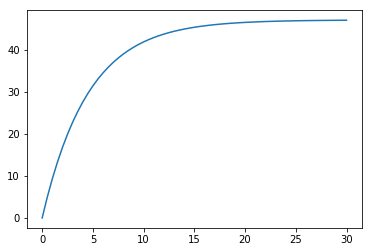

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
dt = 0.5 # step size in s
u=[0.0] # create a list for the velocity array. This contains the initial condition
t=[0.0] # create a list for the time array. starts at t = 0.0
tend = 30.0 # set end time

c = 12.5 # drag coefficientkg/s
m = 60   # object's mass, kg
g = 9.81 # gravitational acceleration m/s/s

# t[-1] returns the last element in the list
while t[-1] < tend:
    unp1 = u[-1] + dt * (g - c/m*u[-1]) # time advance
    u.append(unp1)
    t.append(t[-1] + dt)
    
# tplot = np.linspace(t0,tend,len(u)) # create an equally space array for time. This will be used for plotting.
plt.plot(t,u)

## Method 2: Using Numpy Arrays

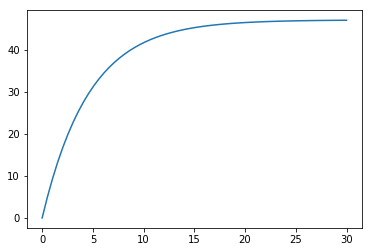

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
dt = 0.5 # step size in s

t0 = 0.0 # set initial time
tend = 30.0 # set end time

ndt = int( (tend-t0)/dt ) # number of timesteps that we will take
t = np.linspace(t0,tend,ndt) # create an equally space array for time. This will be used for plotting.
u= np.zeros(ndt) # allocate a numpy array of the same size as the number of timesteps


c = 12.5 # drag coefficientkg/s
m = 60   # object's mass, kg
g = 9.81 # gravitational acceleration m/s/s

n = 0 # just a counter
while n < ndt-1:
    u[n+1] = u[n] + dt *(g - c/m*u[n]) # time advance
    n += 1
    
plt.plot(t,u)

# Interpolation

Use linear, polynomial, and cubic spline interpolants to interpolate the function
$$ f(x) = e^{-x^2/\sigma^2}$$
on the interval $[-1,1]$. Start with $n=10$ samples and experiment with different values of the standard deviation, $\sigma$.

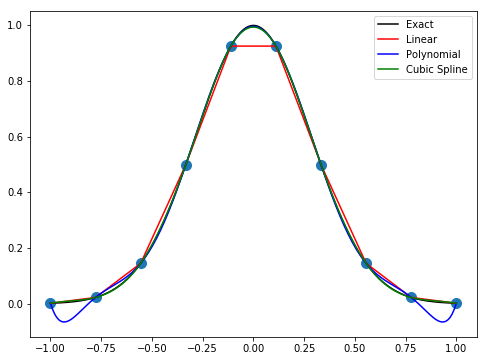

In [151]:
import numpy as np
from numpy import interp
from numpy import polyfit, polyval, poly1d
from scipy.interpolate import CubicSpline

%matplotlib inline
import matplotlib.pyplot as plt

n = 10 # sampling points - we will use this many samples

# we want to interpolate this gaussian data
σ = 0.4
y = lambda x: np.exp(-x**2/σ**2)

# exact solution
xe = np.linspace(-1,1,200) # create equally spaced points between -1 and 1
ye = y(xe)

plt.figure(figsize=(8, 6))

# sampling points
xi = np.linspace(-1,1,n)
yi = y(xi)

# plot sample point locations
plt.plot(xi,yi,'o',markersize=10)

plt.plot(xe,ye,'k-',label='Exact')

# linear interpolation. Interpolate to to xe using sampling points xi
ylin = interp(xe, xi, yi)
plt.plot(xe,ylin,'r-',label='Linear')

# polynomial interpolation. Interpolate to to xe using sampling points xi
p = np.polyfit(xi, yi, n-1)
ypoly =polyval(p,xe)
plt.plot(xe,ypoly,'b-', label='Polynomial')

# cubic spline interpolation. Interpolate to to xe using sampling points xi
cs = CubicSpline(xi,yi)
ycs = cs(xe)
plt.plot(xe,ycs,'g-', label='Cubic Spline')

# finalize plot
plt.legend()
plt.draw()

More examples coming soon!